Project 1 : Question 2.4

----------------------------------------------------------------------- Part (A) ------------------------------------------------------------------------

In [1]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.1 MB/s eta 0:00:00


In [2]:
import igraph
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

m = 4
n = 900

# first graph
g1 = igraph.Graph.Barabasi(n, m, directed=True)

# second graph
g2 = igraph.Graph.Barabasi(n, m, directed=True)

# Shuffle
g2 = g2.permute_vertices(list(np.random.permutation(n)))

# Merge
g1.add_edges(g2.get_edgelist())

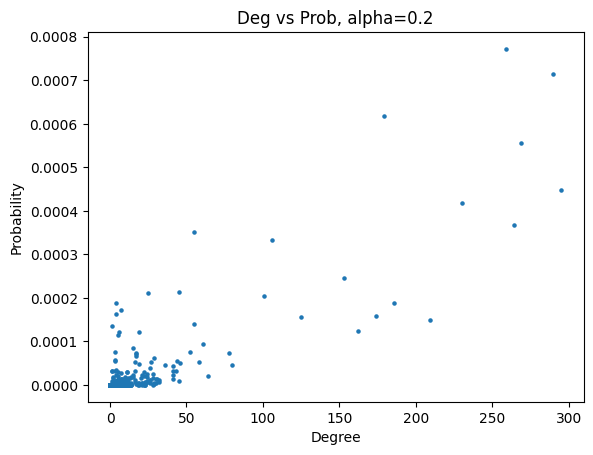

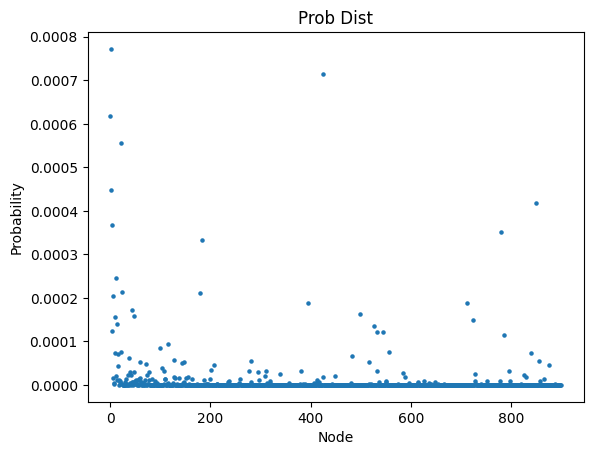

In [12]:
iters = 100
size = 900
# p = np.array([np.zeros(size) for k in range(4)])
p = np.zeros(size)
degrees = np.zeros(size)
alpha = 0.2
first_round = True # get page rank in first round
second_round = False


for iter in range(iters):

  visit_count = np.zeros(size)
  steps = 1000
  current_node = np.random.choice(range(size))

  for i in range(steps):
      # +1 visits
      visit_count[current_node] += 1
      neighbors = g1.successors(current_node)

      if len(neighbors) == 0:
          current_node = np.random.choice(range(size))
      else:
          # Choose next node from neighbors
          # 0.2 teleport
          x = random.randint(100)
          if(x < 100*alpha):
            if not first_round:
              next_node = np.random.choice(range(size),p=p)
            else:
              next_node = np.random.choice(range(size))
          else:
            next_node = np.random.choice(neighbors)
          current_node = next_node

  if first_round:
    second_round = True
    first_round = False
    p = visit_count / np.sum(visit_count)
  elif second_round:
    second_round = False
    p = visit_count / np.sum(visit_count)
  else:
    p += visit_count / np.sum(visit_count)
    p /= 2

# degrees in
degrees = g1.indegree()

p /= iters

plt.scatter(degrees, p, s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Deg vs Prob, alpha=0.2')
plt.show()

plt.scatter(range(len(p)), p, s=5)
plt.xlabel('Node')
plt.ylabel('Probability')
plt.title('Prob Dist')
plt.show()

------------------------------------------------------------------------- Part (B) --------------------------------------------------------------------------

In [13]:
# Find the median PageRank
median_pagerank = np.median(p)

# Find the nodes with PageRank closest to the median
median_nodes = np.argsort(np.abs(p - median_pagerank))[:2]

# Print the IDs of the median nodes
print("Median nodes based on PageRank:")
for node in median_nodes:
    print(node)

Median nodes based on PageRank:
899
501


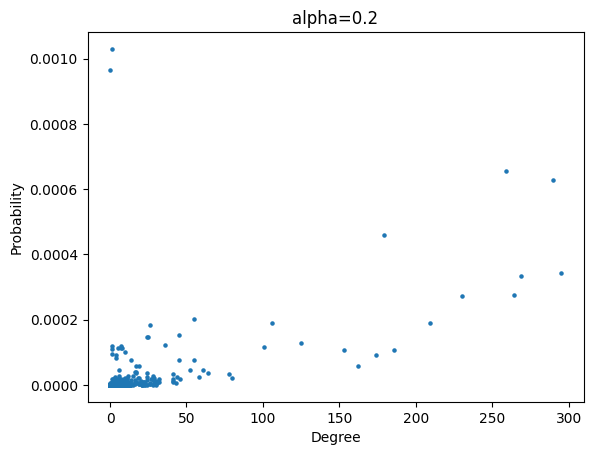

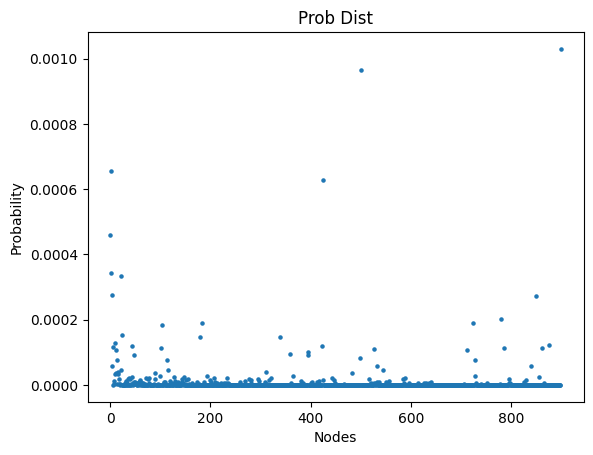

In [14]:
iters = 100
size = 900
# p = np.array([np.zeros(size) for k in range(4)])
p = np.zeros(size)
degrees = np.zeros(size)
alpha = 0.2
first_round = True # get page rank in first round
second_round = False


for iter in range(iters):

  visit_count = np.zeros(size)
  steps = 1000
  current_node = np.random.choice(range(size))

  for i in range(steps):
      # +1 visits
      visit_count[current_node] += 1
      neighbors = g1.successors(current_node)

      if len(neighbors) == 0:
          current_node = np.random.choice(range(size))
      else:
          # Choose next node from neighbors
          # 0.2 teleport
          x = random.randint(100)
          if(x < 100*alpha):
            if not first_round:
              next_node = np.random.choice(median_nodes,p=[0.5,0.5])
            else:
              next_node = np.random.choice(range(size))
          else:
            next_node = np.random.choice(neighbors)
          current_node = next_node

  if first_round:
    second_round = True
    first_round = False
    p = visit_count / np.sum(visit_count)
  elif second_round:
    second_round = False
    p = visit_count / np.sum(visit_count)
  else:
    p += visit_count / np.sum(visit_count)
    p /= 2

# degrees in
degrees = g1.indegree()

p /= iters

plt.scatter(degrees, p, s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('alpha=0.2')
plt.show()

plt.scatter(range(len(p)), p, s=5)
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.title('Prob Dist')
plt.show()